In [1]:
import pandas as pd

In [2]:
df_train=pd.read_csv('data challange/train_preprocess.tsv.txt',sep='\t',names=["Teks", "Target"])
df_valid = pd.read_csv('data challange/valid.csv',sep='\t',names=["Teks", "Target"])

df = df_train.append(df_valid, ignore_index=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8020\2836153327.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_valid, ignore_index=True)


In [3]:
df_test = pd.read_csv('data challange/test.csv',sep='\t',names=["Teks", "Target"])

df = df.append(df_test, ignore_index=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8020\599489437.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_test, ignore_index=True)


In [4]:
df.head()

,Teks,Target
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [5]:
# Melihat jumlah data pada data train dan test
  
print(df.shape)

(11502, 2)


In [6]:
df.isnull().sum()

Teks        0
Target    502
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Teks      0
Target    0
dtype: int64

In [9]:
# Melihat total data Target
df['Target'].value_counts()

positive    6416
negative    3436
neutral     1148
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target'>

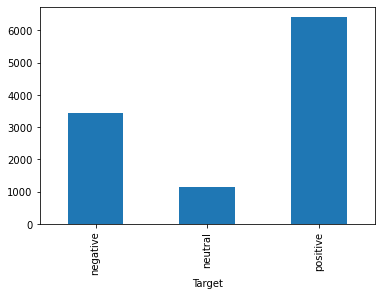

In [10]:
import matplotlib.pyplot as plt
df.groupby('Target').size().plot(kind='bar')

<AxesSubplot:ylabel='None'>

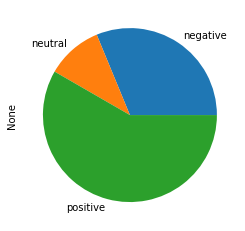

In [11]:
df.groupby('Target').size().plot(kind='pie')

In [12]:
import re 

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

def lowercase(string):
    return string.lower() 

def remove_unnecessary_char(string):
    string = re.sub('\n',' ',string) # Remove every '\n'
    string = re.sub('rt',' ',string) # Remove every retweet symbol
    string = re.sub('user',' ',string) # Remove every username
    string = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',string) # Remove every URL
    string = re.sub('  +', ' ', string) # Remove extra spaces
    string = re.sub(r'pic.twitter.com.[\w]+', '', string) # Remove every pic 
    string = re.sub('gue','saya',string) # replace gue - saya
    string = re.sub(r':', '', string) #Remove symbol 
    string = re.sub(r'‚Ä¶', '', string) #Remove symbol Ä¶
    return string   

In [13]:
df['Teks_clean'] = df.Teks.apply(cleansing)

In [14]:
df.head()

,Teks,Target,Teks_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung t...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kas...


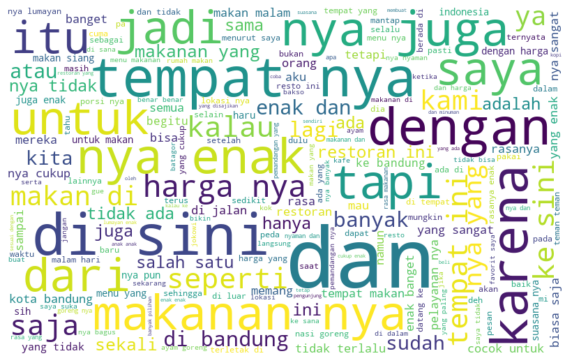

In [15]:
from wordcloud import WordCloud
def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
 
all_words = ' '.join([text for text in df['Teks']])
wordCloud(all_words)

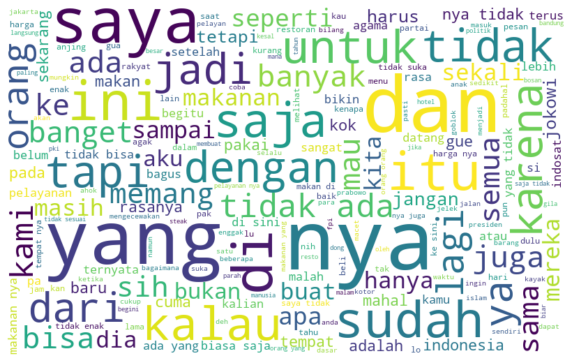

In [16]:
# Melihat kata-kata yang negatif
negative_words = ' '.join(text for text in df['Teks'][df['Target'] == 'negative']) 
wordCloud(negative_words)

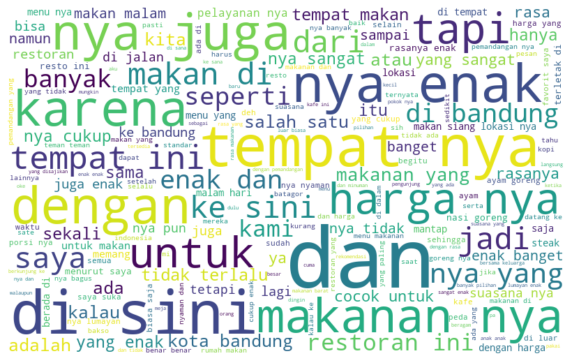

In [17]:
# Melihat kata-kata yang positif
positive_words = ' '.join(text for text in df['Teks'][df['Target'] == 'positive']) 
wordCloud(positive_words)

# **Feature Extraction: Bag of Words**

In [18]:
# Kita simpan teks ke dalam sebuah variabel
data_preprocessed = df.Teks_clean.tolist()

In [19]:
data_preprocessed[0:10]

['warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung   tahu berkualitas   dipadu keahlian memasak   dipadu kretivitas   jadilah warung yang menyajikan menu utama berbahan tahu   ditambah menu umum lain seperti ayam   semuanya selera indonesia   harga cukup terjangkau   jangan lewatkan tahu bletoka nya   tidak kalah dengan yang asli dari tegal  ',
 'mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah pecah',
 'lokasi strategis di jalan sumatera bandung   tempat nya nyaman terutama sofa di lantai 2   paella nya enak   sangat pas dimakan dengan minum bir dingin   appetiser nya juga enak enak  ',
 'betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus   menetapkan beli lagi  ',
 'duh   jadi mahasiswa jangan sombong dong   kasih kartu kuning segala   belajar dulu yang baik   tidak usahlah ikut ikut politik   nanti sudah selesai kuliah nya mau ikut politik juga tidak telat 

In [20]:
# Untuk melakukan Feature Extraction, kita menggunakan library "Sklearn atau scikit-learn".
# Sklearn adalah library untuk melakukan task-task Machine Learning.
# "CountVectorizer" merupakan salah satu modul untuk melakukan "BoW"

from sklearn.feature_extraction.text import CountVectorizer

# Kita proses Feature Extraction
count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)
print ("Feature Extraction selesai")

Feature Extraction selesai


In [21]:
import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

## **Prepare train & test datasets/Splitting Dataset**

In [22]:
from sklearn.model_selection import train_test_split

classes = df.Target

classes

0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10995    positive
10996    positive
10997     neutral
10998    negative
10999    positive
Name: Target, Length: 11000, dtype: object

In [23]:
#Split dataset menjadi 80% untuk train dan 20% untuk test.
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

# **Training (Neural Network)**

In [26]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier() 
model.fit(X_train, y_train)

print ("Training selesai")


Training selesai


In [27]:
pickle.dump(model, open("model.p", "wb"))

# **Evaluation**

Langkah selanjutnya adalah "Evaluation". Module "classification_report" dari Sklearn merupakan salah satu modul untuk melakukan "Evaluation". Pada tahap evaluasi ini kita akan menerapkan metode evaluasi Accuracy, Precision, Recall dan F1-Score.

from sklearn.metrics import classification_report

test = model.predict(X_test)

print ("Testing selesai")

print(classification_report(y_test, test)) 

In [28]:
from sklearn.metrics import classification_report

test = model.predict(X_test)

print ("Testing selesai")

print(classification_report(y_test, test)) 

Testing selesai
              precision    recall  f1-score   support

    negative       0.81      0.79      0.80       723
     neutral       0.78      0.66      0.72       213
    positive       0.87      0.91      0.89      1264

    accuracy                           0.84      2200
   macro avg       0.82      0.79      0.80      2200
weighted avg       0.84      0.84      0.84      2200



# **Cross Validation**

Mekanisme evaluasi selanjutnya menggunakan "Cross Validation", yaitu merotasi porsi testing dari dataset agar bisa melihat model yang sudah kita buat stabil ketika dihadapkan pada data yang berbeda.

In [29]:
# Untuk lebih menyakinkan lagi, kita juga bisa melakukan "Cross Validation"
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = classes

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]

    clf = MLPClassifier()
    clf.fit(data_train,target_train)

    preds = clf.predict(data_test)

    # for the current fold only    
    accuracy = accuracy_score(target_test,preds)

    print("Training ke-", iteration)
    print(classification_report(target_test,preds))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

    negative       0.78      0.78      0.78       680
     neutral       0.79      0.66      0.72       239
    positive       0.87      0.90      0.88      1281

    accuracy                           0.83      2200
   macro avg       0.81      0.78      0.79      2200
weighted avg       0.83      0.83      0.83      2200

Training ke- 2
              precision    recall  f1-score   support

    negative       0.80      0.77      0.79       706
     neutral       0.73      0.73      0.73       220
    positive       0.89      0.91      0.90      1274

    accuracy                           0.84      2200
   macro avg       0.81      0.80      0.80      2200
weighted avg       0.84      0.84      0.84      2200

Training ke- 3
              precision    recall  f1-score   support

    negative       0.80      0.81      0.80       682
     neutral       0.85      0.71      0.77       215
    positive       0.89      0

# **Predict**

In [30]:
original_text =  '''
pelayanan rumah makan ini sangat bagus
'''

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Kita prediksi sentimennya
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

positive


In [31]:
original_text =  '''
dasar anak anjing, gatau diri, kerjaannya nyusahin
'''

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Kita prediksi sentimennya
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

negative


In [32]:
original_text =  '''
budi melihat kucing makan
'''

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Kita prediksi sentimennya
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

neutral
